# Linear 2D

Let us focus for a moment to the  mismatch in a 2D linear system.
Let's try to reduce the Hénon map to a linear system to ease the natural generalizion to NL systems afterwards.

```bash
pip install nafflib
pip install pytori
pip install sympy
```


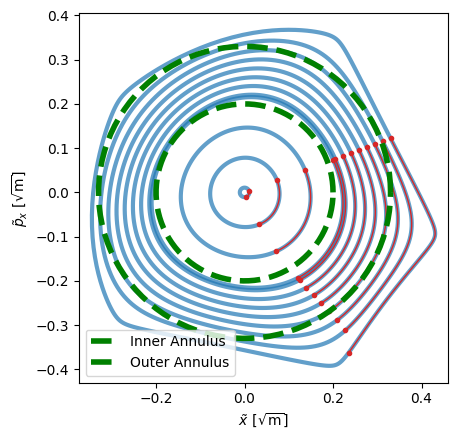

In [31]:
import numpy as np
import matplotlib.pyplot as plt

import nafflib
import pytori as pt
import pytori.plotting as ptplt

# ========================
# Henon parameters
num_turns   = int(2e4)
Q0          = 0.2071
# ========================


# Non-resonant initial conditions
x_start    = np.array([0.01, 0.12, 0.17, 0.02, 0.26,0.3, 0.33,
                       #0.50, 0.55, 0.6
                       ])
x_start_1 = np.linspace(0.01,0.2,4)
x_start_2 = np.linspace(0.205,0.33,8)

x_start = np.concatenate((x_start_1,x_start_2))



#x_start = np.logspace(np.log10(0.33), -2,10)

px_start   = 0.37 * x_start

tori    = []
for x0, px0 in zip(x_start, px_start):
    # Iterating Henon map
    x, px   = nafflib.henon_map(x0, px0, Q0, num_turns)

    # Extracting harmonics:
    #============================================================================
    n_harm  = 100
    w_order = 4
    Ax,Qx   = nafflib.harmonics(x,px,num_harmonics = n_harm,window_order=w_order)
    #============================================================================

    # Indexing harmonics
    #============================================================================
    max_n       = 90 #(high numbers needed in 2D..)
    max_alias   = 50
    warning_tol = np.inf #Disable warnings
    Qvec    = [Qx[0]]
    nx      = nafflib.linear_combinations(Qx,Qvec = Qvec,max_n=max_n,max_alias=max_alias,warning_tol=warning_tol)
    #============================================================================

    # Building torus (2D-torus)
    #============================================================================
    _torus = pt.Torus.from_naff(n=[nx],A=[Ax])
    tori.append(_torus)
    #============================================================================


# Plotting
#--------------------------------------------------


plt.figure()
for torus in tori:
    # Full loop around 0-2pi
    ptplt.xloop(torus,num_points=200,edgecolor='C0',alpha=0.7,lw=3)

    # Free hand plot of the torus
    Tx = np.linspace(0,2*np.pi/4,200) # Theta_x values
    plt.plot(torus.X(Tx), torus.PX(Tx),'-',color='C3',lw=1)
    plt.plot(torus.X(Tx[0]), torus.PX(Tx[0]),'o',color='C3',ms=3)
    plt.plot(torus.X(Tx[-1]), torus.PX(Tx[-1]),'o',color='C3',ms=3)




plt.axis('equal')
plt.gca().set_box_aspect(1) 
plt.xlabel(r'$\tilde x\ [\sqrt{\mathrm{m}}]$');
plt.ylabel(r'$\tilde p_x\ [\sqrt{\mathrm{m}}]$');

# plot an annulus from 0.1 to 0.3
annulus_inner = 0.2
annulus_outer = 0.33
theta = np.linspace(0, 2 * np.pi, 100)
x_inner = annulus_inner * np.cos(theta)
px_inner = annulus_inner * np.sin(theta)
x_outer = annulus_outer * np.cos(theta)
px_outer = annulus_outer * np.sin(theta)  
  
plt.plot(x_inner, px_inner, 'g--',lw=4,label='Inner Annulus')
plt.plot(x_outer, px_outer, 'g--',lw=4,label='Outer Annulus')
plt.legend()

# # Resonant initial conditions
# x_points    = np.array([0.46])
# px_points   = 0.37 * x_points
# res_order = 5

In [11]:
nafflib

<module 'nafflib' from '/Users/guidosterbini/miniforge3/envs/ipac26/lib/python3.13/site-packages/nafflib/__init__.py'>

In [7]:
dir(nafflib)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'backward_compatibility',
 'find_linear_combinations',
 'fundamental_dfft',
 'fundamental_frequency',
 'generate_pure_KAM',
 'generate_signal',
 'get_tune',
 'get_tunes',
 'get_tunes_all',
 'hann',
 'harmonics',
 'henon_map',
 'henon_map_4D',
 'multiparticle_harmonics',
 'multiparticle_tunes',
 'naff',
 'naff_dfft',
 'optimize',
 'toolbox',
 'tune',
 'windowing']

In [2]:
nafflib.henon_map?

Signature: nafflib.henon_map(x, px, Q, num_turns)
Docstring:
Simulates the Henon map for 2D phase space.

Parameters
----------
x : float
    Initial position of the particle.
px : float
    Initial momentum of the particle.
Q : float
    Tune of the map.
num_turns : int
    Number of turns to simulate.

Returns
-------
x,px : tuple of ndarray
    Arrays representing the position and momentum of the particle at each turn.
File:      ~/miniforge3/envs/ipac26/lib/python3.13/site-packages/nafflib/toolbox.py
Type:      function